Привет, меня зовут Люман Аблаев. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

### <font color='orange'>Общее впечатление</font>
* Спасибо, что прислал такую отличную работу!
* Отлично, что bootstrap был корректно использован.
* Я оставил небольшие, но полезные советы. Обрати на них внимание.
* Я нашел небольшую неточность в твоей работе постарайся это поправить. Я думаю у тебя легко это получится!
* Жду твою дополненную работу! (Выводы могут обновиться)


*Привет, Люман.
Большое спасибо за хороший отзыв и твои комментарии.
Ошибки исправил, работу улучшил)*


### <font color='orange'>Общее впечатление</font>
* Спасибо за оперативные правки своей работы!
* Радует, что ты реагируешь на мои комментарии.
* Ты правильно определил регион.
* Каждый шаг теперь выглядит законченным и верно выполненным.
* Я принимаю твою работу и желаю удачи в дальнейшем обучении.
* Продолжай в том же духе!


# Описание проекта

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

<div class="alert alert-block alert-success">
<b>Успех:</b> Спасибо за подробное описание проекта!
</div>

# 1. Загрузка и подготовка данных

In [1]:
#импортируем библиотеки
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 
from sklearn.metrics import r2_score

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
#df_geo_1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Shad/geo_data_0.csv')
#df_geo_2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Shad/geo_data_1.csv')
#df_geo_3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Shad/geo_data_2.csv')

In [4]:
df_geo_1 = pd.read_csv('/datasets/geo_data_0.csv')
df_geo_2 = pd.read_csv('/datasets/geo_data_1.csv')
df_geo_3 = pd.read_csv('/datasets/geo_data_2.csv')

In [5]:
df_geo_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [6]:
df_geo_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
df_geo_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [8]:
df_geo_1.head(10)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
5,wX4Hy,0.969570,0.489775,-0.735383,64.741541
6,tL6pL,0.645075,0.530656,1.780266,49.055285
7,BYPU6,-0.400648,0.808337,-5.624670,72.943292
8,j9Oui,0.643105,-0.551583,2.372141,113.356160
9,OLuZU,2.173381,0.563698,9.441852,127.910945


In [9]:
df_geo_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [10]:
df_geo_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [11]:
df_geo_3.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [12]:
# построим гистограммы признаков

In [13]:
bins_count = 30

Text(0.5, 1.0, 'Region 1, f2')

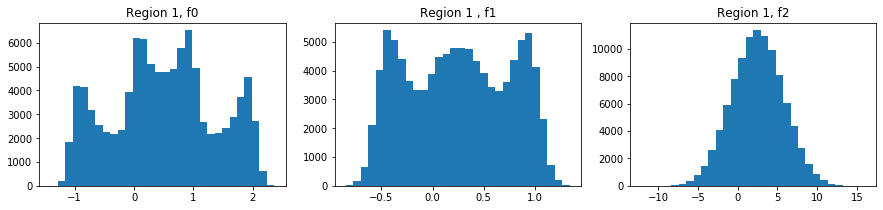

In [14]:
fig, (ax0, ax1,ax2) = plt.subplots(nrows=1, ncols=3,figsize=(15,3))
ax0.hist(df_geo_1['f0'],bins=bins_count)
ax0.set_title('Region 1, f0')

ax1.hist(df_geo_1['f1'],bins=bins_count)
ax1.set_title('Region 1 , f1')

ax2.hist(df_geo_1['f2'],bins=bins_count)
ax2.set_title('Region 1, f2')

Text(0.5, 1.0, 'Region 2, f2')

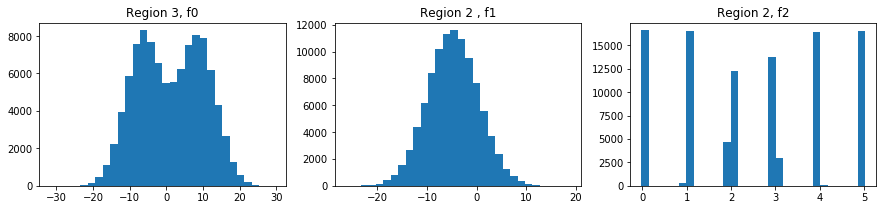

In [15]:
fig, (ax0, ax1,ax2) = plt.subplots(nrows=1, ncols=3,figsize=(15,3))
ax0.hist(df_geo_2['f0'],bins=bins_count)
ax0.set_title('Region 3, f0')

ax1.hist(df_geo_2['f1'],bins=bins_count)
ax1.set_title('Region 2 , f1')

ax2.hist(df_geo_2['f2'],bins=bins_count)
ax2.set_title('Region 2, f2')

Text(0.5, 1.0, 'Region 3, f2')

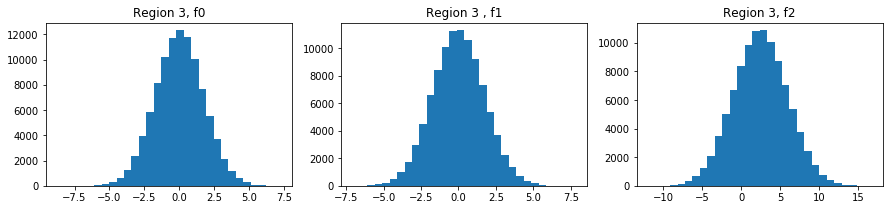

In [16]:
fig, (ax0, ax1,ax2) = plt.subplots(nrows=1, ncols=3,figsize=(15,3))
ax0.hist(df_geo_3['f0'],bins=bins_count)
ax0.set_title('Region 3, f0')
ax1.hist(df_geo_3['f1'],bins=bins_count)
ax1.set_title('Region 3 , f1')
ax2.hist(df_geo_3['f2'],bins=bins_count)
ax2.set_title('Region 3, f2')

 Данные по всем районам однотипные. Пропусков нет.
Все три набора данных полученных с каждого региона по разным признакам отличаються доуг от друга разными формами распределения.

Данных полученные со второго региона по признаку f2 имеют больший разброс, и сильно отличаются по форме распределения от остальных, возможно это говорит о некой особенности данного региона.



<div class="alert alert-block alert-success">
<b>Успех:</b> Загрузка данных и первичный анализ сделаны верно.
</div>

# 2. Обучение и проверка модели

Для начала разобьем данные каждого региона на тестовые и валидационные выборки, затем обучим для каждого региона модели на своих данных.



# Разделим данные на выборки

In [17]:
# разделим данные на обучающую и обучающую и валидационную выборки, 

In [18]:
x_geo_1 = df_geo_1.drop(['id','product'],axis=1)
y_geo_1 = df_geo_1['product']

In [19]:
x_geo_1_train, x_geo_1_test, y_geo_1_train, y_geo_1_test = train_test_split(
    x_geo_1, y_geo_1, test_size = 0.25, random_state = 12345)

In [20]:
print (len(y_geo_1_train), len(x_geo_1_test))

75000 25000


In [21]:
x_geo_2 = df_geo_2.drop(['id','product'],axis=1)
y_geo_2 = df_geo_2['product']

In [22]:
x_geo_2_train, x_geo_2_test, y_geo_2_train, y_geo_2_test = train_test_split(
    x_geo_2, y_geo_2, test_size = 0.25, random_state = 12345)

In [23]:
print (len(y_geo_2_train), len(x_geo_2_test))

75000 25000


In [24]:
x_geo_3 = df_geo_3.drop(['id','product'],axis=1)
y_geo_3 = df_geo_3['product']

In [25]:
x_geo_3_train, x_geo_3_test, y_geo_3_train, y_geo_3_test = train_test_split(
    x_geo_3, y_geo_3, test_size = 0.25, random_state = 12345)

In [26]:
print (len(y_geo_1_train), len(x_geo_1_test))

75000 25000


<div class="alert alert-block alert-success">
<b>Успех:</b> Разбиение выполнено корректно, молодец, что проверяешь размеры выборок.
</div>

# Обучим модели для каждого из регионов и получим предсказания.

In [27]:
model_1 = LinearRegression()

In [28]:
# обучим модель 
model_1.fit(x_geo_1_train, y_geo_1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
# сохраним результат работы моедли для первого региона
predict_1 = pd.Series(model_1.predict(x_geo_1_test),index=x_geo_1_test.index)

In [30]:
mse_1 = mean_squared_error(y_geo_1_test, predict_1)

In [31]:
print('RMSE модели по обьедененным данным первого региона', mse_1 ** 0.5)
print('Cреднее предсказанного запаса сырья для первого региона',predict_1.mean())

RMSE модели по обьедененным данным первого региона 37.5794217150813
Cреднее предсказанного запаса сырья для первого региона 92.59256778438038


In [32]:
# Обучим модель для вторго региона 

In [33]:
model_r2 = LinearRegression()

In [34]:
model_r2.fit(x_geo_2_train, y_geo_2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
predict_2 = pd.Series(model_r2.predict(x_geo_2_test),index=x_geo_2_test.index)

In [36]:
mse_2 = mean_squared_error(y_geo_2_test, predict_2)

In [37]:
print('RMSE модели по обьедененным данным терьего региона', mse_2 ** 0.5)
print('Cреднее предсказанного запаса сырья для первого региона',predict_2.mean())

RMSE модели по обьедененным данным терьего региона 0.893099286775616
Cреднее предсказанного запаса сырья для первого региона 68.728546895446


Показатели модели второго региона очень хорошие модель точна в своих предсказаниях.

In [38]:
# Обучим модель обученную только на даных первого региона
model_3 = LinearRegression()

In [39]:
model_3.fit(x_geo_3_train, y_geo_3_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
predict_3 = pd.Series(model_3.predict(x_geo_3_test),index=x_geo_3_test.index)

In [41]:
mse_3 = mean_squared_error(y_geo_3_test, predict_3)

In [42]:
print('RMSE модели по обьедененным данным терьего региона', mse_3 ** 0.5)
print('Cреднее предсказанного запаса сырья для первого региона',predict_3.mean())

RMSE модели по обьедененным данным терьего региона 40.02970873393434
Cреднее предсказанного запаса сырья для первого региона 94.96504596800489




Итог:
Мы получили две модели, для вторго региона с отличными метриакми и для первого и тертьего регионов с более худшими показателями.
После проверки и обучения модели на данных полученныз только с первого региона показатели для него улучшились незначительно. Проверку для третьего региона было решено не делать.

<div class="alert alert-block alert-info">
<b>Совет:</b> Линейные модели любят, когда данные масштабированы.
</div>

*я пробовал маштабировать, как мне показалось это не дало сильного прироста к показателям модели.*

<div class="alert alert-block alert-success">
<b>Успех[2]:</b> Да согласен, в этом случае прироста не вышло. Однако хуже от этого точно не будет =) 
</div>

<div class="alert alert-block alert-success">
<b>Успех:</b> В целом все сделано хорошо.
</div>

# 3. Подготовка к расчёту прибыли

Условия

Для разведки региона используют 500 точек и выбирают 200 лучших по результатам модели

Затраты на разработку 200-т вышек 10 млрд

Цена за 1 еденицу продукта 450 000 



In [43]:
# Для разработки региона отбирают 200 вышек, стоимость затран на разработку 10 000 000 000. 
# найдем точку безубыточности 

# точка безубыточности
BEP = (10000000000 / 450000) / 200
# Цена за еденицу продукта
PRICE = 450000
# Кол-во вышек для разработки региона
COUNT = 200
# Затраты на разработку региона
COST = 10000000000

<div class="alert alert-block alert-info">
<b>Совет:</b> Константы принято записывать в ВЕРХНЕМ РЕГИСТРЕ.
</div>

*Спасибо, за комментарий, поправил*

<div class="alert alert-block alert-success">
<b>Успех[2]:</b> Хорошо.
</div>

Минимальное кол-во сырья  на одну вышку в регионе, для его безубыточной разработки 111,11 тыс едениц продукта


In [44]:
# оценим среднее кол-во едениц продукта на одну вышку

In [45]:
y_geo_1.mean()

92.50000000000001

In [46]:
y_geo_2.mean()

68.82500000000002

In [47]:
y_geo_3.mean()

95.00000000000004

Средний показатель модели и фактический очень близки. Но очень низок по сравнению с данными по точке безубыточности.

<div class="alert alert-block alert-success">
<b>Успех:</b> Значение посчитано правильно. Вывод логичен.
</div>

# 4. Расчёт прибыли и рисков 

In [48]:
# функция расчета прибыли 

In [49]:
def revenue(valid_data, predicted_data,count):
  top_predicted = predicted_data.sort_values(ascending=False)
  selected = valid_data[top_predicted.index][:COUNT]
  return selected.sum() * PRICE - COST

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Прибыль = доходы - расходы. А у тебя здесь только доход.
</div>

*Спасибо, не внимательно прочитал условия задачи. Поправил*

<div class="alert alert-block alert-success">
<b>Успех[2]:</b> Ничего страшного, бывает.
</div>

In [50]:
# определим прибыль с каждого региона основываясь на прогнозах модлей

In [51]:
def check_risk(y_test, predict):

  state = np.random.RandomState(12345)
  values = []
  for i in range(1000):
    geo_subsamle = y_test.sample(n=500, replace=True, random_state=state)
    
    predict_subsample = predict.loc[geo_subsamle.index] 
    values.append(revenue(geo_subsamle,predict_subsample,COUNT))

  values = pd.Series(values)
  return values

<div class="alert alert-block alert-info">
<b>Совет[2]:</b> Мне кажется, твоя функция не совсем риски находит, а оценивает целый регион получая прибыль, используя бутстрап. <br> Лучше называть функции так, чтобы проще было понять, что они выполняют и какова их цель по названию.
</div>

In [52]:
value_1 = check_risk(y_geo_1_test, predict_1)

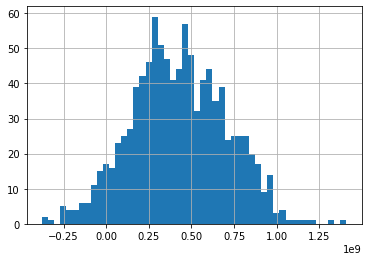

In [53]:
value_1.hist(bins=50)

<div class="alert alert-block alert-info">
<b>Совет:</b> Можно считать риски попроще:
    
    (values < 0).mean()
</div>

*Да, так действительно проще и локаничней, спасибо*

## Первый регион

In [54]:
print('Средняя прибыль по первому региону', value_1.mean())
print('Вероятность убытков %', (value_1 < 0).mean())
print('Минимальна прибыль с вероятностью 97,5%', value_1.quantile(0.025))
print('95-й доверительный интервал для прибыли (возможная брибыль 95%) от ', value_1.quantile(0.025) ,'до',value_1.quantile(0.975))

Средняя прибыль по первому региону 425938526.9105923
Вероятность убытков % 0.06
Минимальна прибыль с вероятностью 97,5% -102090094.83793654
95-й доверительный интервал для прибыли (возможная брибыль 95%) от  -102090094.83793654 до 947976353.358369


## Второй регион

In [55]:
value_2 = check_risk(y_geo_2_test, predict_2)

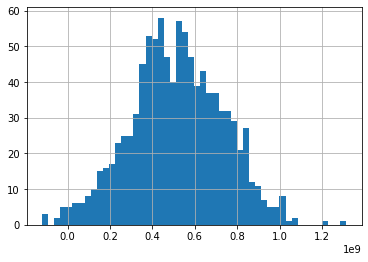

In [56]:
value_2.hist(bins=50)

## Третий Регион

In [57]:
print('Средняя прибыль по первому региону', value_2.mean())
print('Вероятность убытков %', (value_2 < 0).mean())
print('Минимальна прибыль с вероятностью 97,5%', value_2.quantile(0.025))
print('95-й доверительный интервал для прибыли (возможная брибыль 95%) от', value_2.quantile(0.025) ,'до',value_2.quantile(0.975))

Средняя прибыль по первому региону 515222773.44328994
Вероятность убытков % 0.01
Минимальна прибыль с вероятностью 97,5% 68873225.37050177
95-й доверительный интервал для прибыли (возможная брибыль 95%) от 68873225.37050177 до 931547591.2570496


In [58]:
value_3 = check_risk(y_geo_3_test, predict_3)

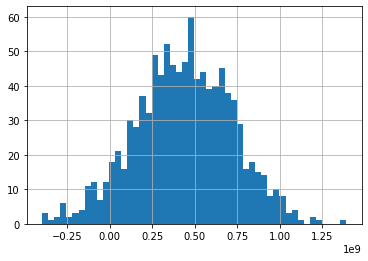

In [59]:
value_3.hist(bins=50)

In [60]:
print('Средняя прибыль по первому региону', value_3.mean())
print('Вероятность убытков %', (value_3 < 0).mean())
print('Минимальна прибыль с вероятностью 97,5%', value_3.quantile(0.025))
print('95-й доверительный интервал для прибыли (возможная брибыль 95%) от', value_3.quantile(0.025) ,'до',value_3.quantile(0.975))

Средняя прибыль по первому региону 435008362.78275555
Вероятность убытков % 0.064
Минимальна прибыль с вероятностью 97,5% -128880547.32978901
95-й доверительный интервал для прибыли (возможная брибыль 95%) от -128880547.32978901 до 969706954.1802679


<div class="alert alert-block alert-info">
<b>Совет:</b> 95% интервал это 0.025 и 0.975 квантили. Лучше выводить именно их.
</div>

*Поправил*

<div class="alert alert-block alert-success">
<b>Успех[2]:</b> Отлично.
</div>

# Итог
Под условия поставленной задачи для дальнейшей разработки подходит только второй регион.


Риски получить убыток по данному региону наименьшие среди всех изученных. И полностью соответсвуют условию получить убытки с вероятностью 2,5%

Вероятнее всего данный регион хорош из-за своей скрытой для нас особенности, которая нам видна только на гисторамме. Среди всех остальных регионов его три показателя имеют различные распределения, данных.

Так же модель на этих данных дала самый высокоточные предсказания.

Касательно первого и третьего региона, были предприняты попытки обьеденить их датасеты и обучить для оду модель. Целевые показатели оказались ниже чем на индивидуальных данныхю






<div class="alert alert-block alert-success">
<b>Успех:</b> Всегда приятно видеть итоговый вывод в конце проекта.
</div>

<div class="alert alert-block alert-success">
<b>Успех[2]:</b> С выбором региона согласен.
</div>

# Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован